In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration globale pour l'affichage pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)  # Optionnel : limite le nombre de lignes affichées


In [281]:
data=pd.read_csv("../data/RAW_interactions.csv")

Exploration initiale

In [282]:
##Aperçu des données
data.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"


In [283]:
##Affichage aleatoire de 10 lignes
data.sample(10)

,user_id,recipe_id,date,rating,review
598328,373020,106885,2011-08-02,5,"Holy cow these are great!!! I made as written and made as dessert to my family of 6 and 6 teenagers. My pan made 20 generous slices and all are now gone. My husband and children are upset there is none left for tomorrow. Looks like I am baking them again, perhaps even again tomorrow. I wish I were apart of your Christmas bake exchange!! Thanks Pamela for posting the recipe."
503422,2000922998,31750,2016-03-16,5,My mommy makes these all the time 4 me therrrreeee great!!!!
81053,1048179,23439,2012-07-09,5,"This was yummy! Very garlicky but we were warned! I loved the combination of the feta and garlic and it had a perfect cheese spread texture. I used the leftovers as the base for a garlic chicken pizza, yummmm!"
222317,860079,263497,2010-01-24,5,"Oh this is a VERY GOOD soup ! I only had 5 links of mild chicken italian sausage, but I used the full measure of everything else, plus added 1/2 teaspoon red pepper flakes. Great flavor, and I love the little orzo pasta in this ~ it was perfect for a rainy evening. Thanks NoraMarie ~ made for SOUP'S ON, DIABETIC FORUM TAG, January 2010!"
260147,169430,257499,2007-10-15,4,"WOW, this is pungent. With some salt it will flavor pretty much anything but I think that it would be really exceptional on beef. If your heat shy back of on the cayenne! It's very bold at full teaspoon. I think it could use more cinnamon but thats just me and you might not agree with that. Thanks for this Engrossed.*EDIT*: after using this on salmon, chicken and adding it to a soup I must add that it calm's quite a lot when cooked with your desired dish."
249418,275527,52420,2007-01-11,4,DH and I thought these were very good. Full of flavor and easy to make! I followed recipe exactly as stated. Thanks!
789784,198129,71074,2005-12-09,5,very nice! Thankyou
94261,52125,28758,2006-12-30,5,Wonderful pumpkin pie! Tasted great and everyone enjoyed it very much. Thanks NurseDi....
615581,940747,318008,2013-10-04,0,Has anyone tried this with turkey meat? Sounds really good but I think I will try with turkey meat.
897757,1142053,279315,2009-01-24,5,Excellent recipe!


In [284]:
##Structure des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [285]:
##la taille des données
nombre_de_lignes, nombre_de_colonnes = data.shape
print(f"le nombre de lignes est : {nombre_de_lignes}")
print(f"le nombre de colonnes est : {nombre_de_colonnes}")

le nombre de lignes est : 1132367
le nombre de colonnes est : 5


Nous disposons un dataset contenant 113236 observations et 5 variables decrivatnt les interactions des utilisateurs avec le recettes de cuisines,et ci-dessous la description des variables:
- user_id : identifiant unique de l'utilisateur
 - recipe_id : identifiant unique de la recette
 - rating : note attribuée par l'utilisateur à la recette (échelle de 1 à 5)
 - date: date de l'interaction
 - review: commentaire textuel laissé par l'utilisateur sur la recette.

In [286]:
##Detection des nombres des valeurs manquantes par colonne
print(data.isnull().sum())


user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


In [287]:
##Detection de pourcetage des valeurs manquantes par colonne
print(data.isna().mean()*100)

user_id      0.000000
recipe_id    0.000000
date         0.000000
rating       0.000000
review       0.014924
dtype: float64


In [288]:
##detection des pourcentages des valeurs manquantes du dataset
print(data.isna().mean().mean()*100)

0.0029848980056819035


In [289]:
##interpretation des valeurs manquantes:nous observons que la colonne review a 0,015% de valeurs manquantes.il est trop faible comme pourcentage et nous pouvons les ignorer,comme il s'agit des données textuelles liée a des avis des utilisatures sur les recettes,alors nous pouvons les imputer par des descriptions dependants des autres colonnes,comme le note de la recette

In [290]:
##affichage des lignes dont la note est superieur ou egale a 4 et la colonne review,afin de pouvoir voir comment les commentaire sont formulés.
data[data['rating']<4].sample(5)

,user_id,recipe_id,date,rating,review
338387,2914578,137674,2013-07-24,0,Awesome dish 4 vegeterian ...just add little beat of capsicum
1039775,209137,99086,2006-08-04,3,Served this last night with pasta. I used Progresso Italian bread crumbs and added some garlic powder. I thought they were on the salty side. Next time I'll use plain bread crumbs and add italian seasonings myself. Overall we enjoyed these. My son (10) was not thrilled but my 6 year old daughter liked them.
490800,2209239,475446,2012-03-12,0,this sounds excellent! can't wait to try it!
749710,633027,161522,2009-08-18,3,"We made this tonight as a side for our tacos. I followed the directions exactly. I agree with a previous reviewer who said it seems like it's missing something...it's got the heat but not necessarily the spice (maybe next time I will try adding some taco seasoning or something). It was good, and I'm planning on trying again and seeing if I can figure out what type of spice it needs to take it over the top for our family. It was definitely quick and easy and I appreciate that it only requires a couple of ingredients. Thanks for posting!!!!"
43574,1803605727,454691,2015-06-03,1,This is a terrible alternative to Aji Amarillo! Wow. Awful. Get some real ethic recipes and quit white-ifying everything. Yuck.


In [291]:
####Affichons les lignes qui ont des valeurs manquantes dans la colonne review.
data[data['review'].isnull()].sample(5)

,user_id,recipe_id,date,rating,review
1014761,2001874984,241359,2017-12-21,5,NaN
205063,2689825,495271,2013-02-12,5,NaN
159641,2001514101,351631,2017-04-30,5,NaN
601216,2002160084,55971,2018-05-21,5,NaN
198376,2001878357,205890,2017-12-22,5,NaN


In [292]:
###affiché les nombres des valeur manquantes de la colonne par ligne en fonction de la note
print(data[data['review'].isnull()]['rating'].value_counts())

rating
5    135
4     27
3      3
1      3
2      1
Name: count, dtype: int64


In [293]:
##Nous allons imputer les valeurs manquantes de la colonne review en fonction de la note(rating) de la recette.
def imputer_review(row):
    if pd.isnull(row['review']):
        if row['rating'] == 5:
            return "Excellent recipe! Loved it!"
        elif row['rating'] == 4:
            return "Great recipe, will make again."
        elif row['rating'] == 3:
            return "Good recipe, but could be improved."
        elif row['rating'] == 2:
            return "Not my favorite."
        elif row['rating'] == 1:
            return "Did not like this recipe at all."
    else:
        return row['review']



In [294]:
##Application de la fonction d'imputation
data['review'] = data.apply(imputer_review, axis=1)

# Vérifions les valeurs manquantes après l'imputation
print("Valeurs manquantes après imputation :")
print(data['review'].isnull().sum())

Valeurs manquantes après imputation :
0


In [295]:
# Créer une liste des commentaires imputés
commentaires_imputes = [
    "Excellent recipe! Loved it!",
    "Great recipe, will make again.",
    "Good recipe, but could be improved.",
    "Not my favorite.",
    "Did not like this recipe at all.",
]

# Créer la colonne indicatrice (1 = imputé, 0 = original)
data['review_imputed'] = data['review'].isin(commentaires_imputes).astype(int)

# Vérifier les résultats
print("Nombre de reviews par type :")
print(data['review_imputed'].value_counts())
print("\nPourcentage :")
print(data['review_imputed'].value_counts(normalize=True) * 100)

Nombre de reviews par type :
review_imputed
0    1132197
1        170
Name: count, dtype: int64

Pourcentage :
review_imputed
0    99.984987
1     0.015013
Name: proportion, dtype: float64


In [296]:
##Affichons nombre total des donnée observé avant et après le traitement des valeurs manquantes
print(f"Nombre total de lignes dans le dataset après traitement des valeurs manquantes : {data.shape[0]}")


Nombre total de lignes dans le dataset après traitement des valeurs manquantes : 1132367


In [297]:
##Affichage des dataset aprés traitement des valeurs manquantes
data.head()

,user_id,recipe_id,date,rating,review,review_imputed
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.,0
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!",0
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!,0
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.,0
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!",0


In [298]:
###Detection des doublons
print(f"Nombre de doublons dans le dataset : {data.duplicated().sum()}")

Nombre de doublons dans le dataset : 0


In [299]:
##affichons les utilisateurs qui ont commenté plus d'une fois la même recette.
data[data.duplicated(subset=['user_id', 'recipe_id'], keep=False)]


,user_id,recipe_id,date,rating,review,review_imputed


Nous observons qu'il y'a pas de doublons.

In [300]:
##conversions des types de données
data['date']=pd.to_datetime(data['date'])
data['user_id']=data['user_id'].astype('category')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   user_id         1132367 non-null  category      
 1   recipe_id       1132367 non-null  int64         
 2   date            1132367 non-null  datetime64[ns]
 3   rating          1132367 non-null  int64         
 4   review          1132367 non-null  object        
 5   review_imputed  1132367 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(1)
memory usage: 57.3+ MB
None


In [301]:
###Verification si les données sont cohérentes et valides,affichon les lignes dont la note est inferieur a 3
data[data['rating'] <= 3].sample(5)

,user_id,recipe_id,date,rating,review,review_imputed
320282,2000764219,102335,2015-12-22,0,"I used horseradish sauce instead of mayo, absolutely fabulous",0
787034,2427825,487210,2012-10-01,0,I'm trying these today! They look amazing.,0
506543,1457912,414333,2010-03-19,1,"I dont know what I did wrong but this came out greasy and flavorless, I followed all of the directions correctly but its 100% un-edible",0
52434,336058,326643,2008-11-02,3,"I got mixed reviews. Two kids didn't like it. One did and my DH liked it. This would be good in summer, when you're hot and thirsty. I had leftover cant. that I had frozen. I thawed it and pureed it (no added water). Then I mixed the sugar and pulp and cooked it on the stove for a few minutes, kind of like a simple syrup concoction. I then strained all the juice into the pitcher. I had about 1/2 C of pulp left. Added water, ice and a little more sugar. I might try again, experimenting with added another flavor (maybe mint?) Tagged for Kid Friendly tag.",0
1124315,441188,316578,2009-12-11,0,"I like it when people tell the changes they made. I thought hers were pretty minor, since sake and mirin are two things that a lot of people don't commonly have on hand. And changing the meat is a common change, too.",0


nous observons que plusieurs lignes du jeu de données présentent une note égale à 0 (rating = 0), tout en contenant un commentaire textuel (review) souvent positif ou négatif.
Cette situation est incohérente : une note de 0 ne correspond pas à une appréciation valide sur une échelle de 1 à 5, et le contenu des commentaires indique que les utilisateurs ont bien exprimé une opinion sur la recette.

Nous en déduisons que la valeur 0 ne traduit pas une mauvaise note, mais plutôt l’absence de note — autrement dit, une valeur manquante codée par 0.

En conséquence, nous considérons toutes les notes égales à 0 comme valeurs manquantes et nous les remplaçons par NaN afin de ne pas biaiser les statistiques descriptives ni les calculs de moyennes.
Cela revient à interpréter ces cas comme des utilisateurs ayant laissé un commentaire sans attribuer de note chiffrée.

In [302]:
##remplacons les notes invalides par NaN
data.loc[data['rating'] == 0, 'rating'] = np.nan

In [303]:
##verifions les valeurs manquantes après le remplacement
print(data['rating'].isnull().sum())

60847


Analyse descriptive

In [304]:
##Nous allons commencer a etudié d'abord comment la note(rating) valide est distribuée dans le dataset.
data_without_0=data[data['rating'].notna()]

In [305]:
data_without_0['rating'].describe()

count    1.071520e+06
mean     4.661499e+00
std      7.230534e-01
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [306]:
data_without_0['rating'].value_counts(normalize=True)*100

rating
5.0    76.187472
4.0    17.485441
3.0     3.812808
2.0     1.318034
1.0     1.196245
Name: proportion, dtype: float64

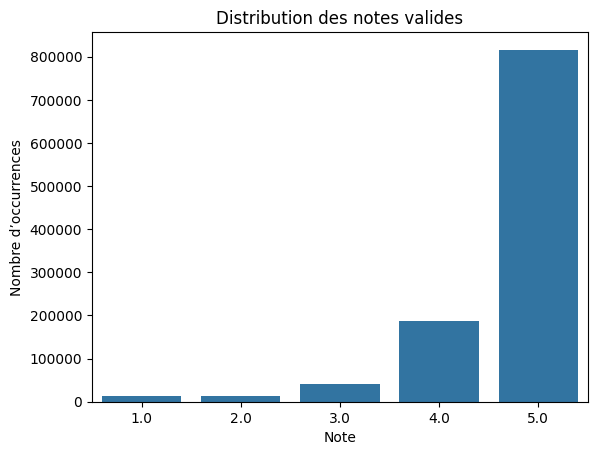

In [307]:
sns.countplot(x='rating', data=data_without_0)
plt.title("Distribution des notes valides")
plt.xlabel("Note")
plt.ylabel("Nombre d’occurrences")
plt.show()

L’analyse univariée de la variable rating met en évidence une forte concentration des évaluations sur les valeurs hautes de l’échelle (4 et 5).
Ce biais positif traduit une satisfaction générale élevée sur la plateforme, mais il indique aussi que la variable rating n’est pas symétriquement distribuée.

In [308]:
###Calculons le nombre totale d interactions par utilisateur
interactions_user = data['user_id'].value_counts()
interactions_user.describe()

count    226570.000000
mean          4.997868
std          49.663111
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        7671.000000
Name: count, dtype: float64

In [309]:
##Etudions maintenant la variable userid en determinons le top 10 des utilisateurs qui ont le plus interagi avec les recettes en fonction du nombre d'avis laissés.
top_users = data['user_id'].value_counts().sample(10)
print(top_users)


user_id
2000875883     1
677382         1
2000963022     1
1613358        1
125736        16
231710         1
623055         6
138811         3
907730         1
337935         2
Name: count, dtype: int64


In [310]:
data_without_0['avg_rating'] = data_without_0.groupby('recipe_id')['rating'].transform('mean')


C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_12976\3604513073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_0['avg_rating'] = data_without_0.groupby('recipe_id')['rating'].transform('mean')


In [311]:
#afficher tous les avis de la recette 40893
data_without_0.head()



,user_id,recipe_id,date,rating,review,review_imputed,avg_rating
0,38094,40893,2003-02-17,4.0,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.,0,4.5
1,1293707,40893,2011-12-21,5.0,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!",0,4.5
2,8937,44394,2002-12-01,4.0,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!,0,4.0
3,126440,85009,2010-02-27,5.0,I made the Mexican topping and took it to bunko. Everyone loved it.,0,5.0
4,57222,85009,2011-10-01,5.0,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!",0,5.0


In [312]:
data.sample(20)


,user_id,recipe_id,date,rating,review,review_imputed
1060782,310155,47941,2009-06-06,5.0,"Loved it! I think this recipe is definitely as good as your ingredients. I made it with a parmesan from the jar. Next time I will use freshly grated as the recipe says. I used LARGE pinches of the herbs, we like things flavorful, and I added chopped tomato and black olives. Thought about Red Pepper but passed on it, though may try another time. Thanks for a great recipe that would go with a large variety of Summer Fare. This will become a Tried and True at my house!",0
217103,11297,13632,2008-12-15,5.0,"A very easy and tasty side dish. I added some sliced carrots for added colour to the mix and this worked well. This side went well with recipe#138414, gravy and baked potatoes A 'keeper' :)",0
195471,583276,45392,2007-10-21,4.0,"The dish was very good. I added garlic with the spices and sprinkled with parmesan when it was done. Only problem was the time was way off. I did 30 min at 375 and then bumped it up to 425 for the last 10 min with my asparagus, and the potatoes were still not cooked all the way. Since all my food was done I had to throw them in the mircrowave for 5 min to finish cooking.",0
733403,313984,364488,2014-04-15,5.0,I make this recipe for my family and friends all the time. They love it. As I mentioned in the previous review I tried covering it with white chocolate and drizzling dark on top of it. It was a great success. I also did the base using my gluten free flour mix and the shortbread was the best ever. Thank you to Kittycatmon for the orgininal recipe.,0
206916,1861695,19033,2011-11-15,4.0,I love reuben's. Try them this way: Very lightly butter (or Margarine) each party rye. Top with (in order) little slice of corned beef Then little slice of swiss cheese. Drain saurkraut and mix just with enough mayo so kraut wont fall off the sandwich. Dot with a little paprika and broil just until cheese is melted and bubbly. My family loves these little open faced sandwiches.,0
514232,165217,399297,2011-03-28,NaN,"This recipe was created by Todd Wilbur for his book ""Top Secret Restaurant Recipes 3 (Penguin/Putnam) www.TopSecretRecipes.com",0
89385,128473,261263,2008-12-11,5.0,"These were wonderful semi-sweet, subtly flavored orange muffins. My dh & I enjoyed them very much. Made exactly as written we got 1 dozen muffins from the batter. They were quick and easy to make. The batter was thick but easy to work with. The muffins were crisp and crunchy on the outside and tender and moist on the inside. Thanks so much for sharing your moms recipe.",0
482223,226863,490460,2013-07-30,5.0,"This is wonderful! I&#039;m so used to veggies with lots of seasoning, but this lets the veggies just shine through. (No Soy!!) Once I cut everything up and looked at the ratio, I decided to increase the broccoli a bit for a bit more green. So quick and easy, and just delicious! Thanks for sharing! Made for Rookie tag game.",0
869422,464509,80782,2007-08-13,4.0,super tasty! I will make them again but next time I will double the topping because it was very thin. It had a fantastic flavor I served it with a scoop of vanilla ice cream.thanks,0
3616,2597942,513016,2014-05-11,4.0,"Made these cookie bars this afternoon to take to the neighbors cook-out / bon-fire this evening. These were very easy to put together and the flavor was pretty tasty. The texture was a bit strange, but I&#039;m assuming that is because it uses a cake mix. I will try making these again, and maybe skip the walnuts next time. Thanks for posting. (Made for PAC 2014)",0


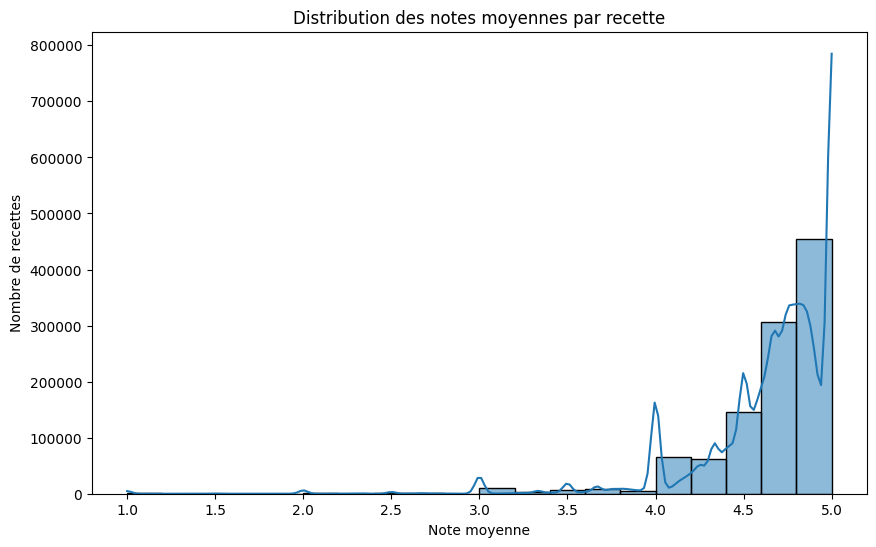

In [313]:
### etudions la variable average rating,nous allons commencer par visualiser la distribution des notes moyennes par recette.
plt.figure(figsize=(10, 6))
sns.histplot(data_without_0['avg_rating'], bins=20, kde=True)
plt.title("Distribution des notes moyennes par recette")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de recettes")
plt.show()

Text(0.5, 0, 'User ID')

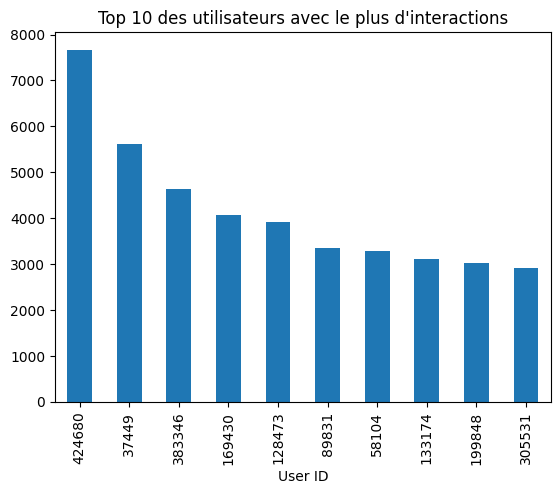

In [314]:
data['user_id'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des utilisateurs avec le plus d\'interactions')
plt.xlabel('User ID')

In [315]:
##Calculons la proportion des utilisateurs qui ont laissé moins de 2 avis
proportion_moins_de_2_avis = (data['user_id'].value_counts() < 2).mean() * 100
print(f"Proportion des utilisateurs ayant laissé moins de 2 avis : {proportion_moins_de_2_avis:.2f}%")

Proportion des utilisateurs ayant laissé moins de 2 avis : 73.38%


analyse de la variable UserID met en évidence une forte disparité d’activité sur la plateforme :

- 73,38 % des utilisateurs n’ont laissé qu’un seul avis, ce qui traduit un comportement ponctuel.
- Une minorité d’utilisateurs hyperactifs contribue à une part importante des évaluations (jusqu’à 7 671 avis pour le plus actif).

En conséquence, les analyses globales (par exemple la moyenne des notes) peuvent être biaisées par la surreprésentation des utilisateurs les plus actifs.

Il est donc crucial, dans la suite de l’étude, d’examiner le lien entre le niveau d’activité UserID et les notes attribuées Rating afin de vérifier si ces utilisateurs très actifs sont également ceux qui attribuent systématiquement les notes les plus élevées.

In [316]:
##
data.groupby('user_id')['rating'].mean().describe()

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_12976\2131936807.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('user_id')['rating'].mean().describe()


count    196098.000000
mean          4.557734
std           0.900728
min           1.000000
25%           4.500000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_12976\85155428.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_without_0.groupby('user_id')['rating'].mean().hist(bins=30, rwidth=0.9)


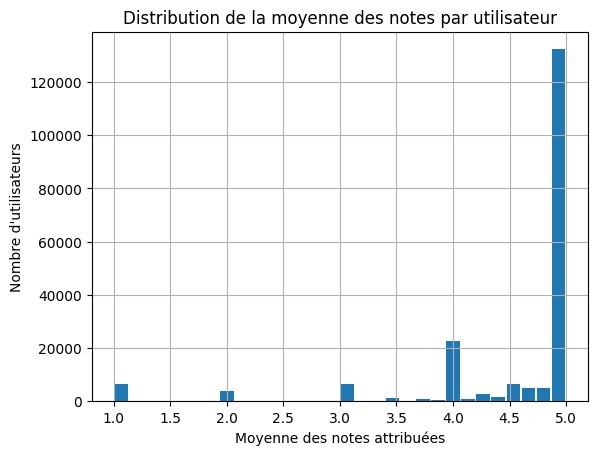

In [317]:
data_without_0.groupby('user_id')['rating'].mean().hist(bins=30, rwidth=0.9)
plt.title("Distribution de la moyenne des notes par utilisateur")
plt.xlabel("Moyenne des notes attribuées")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

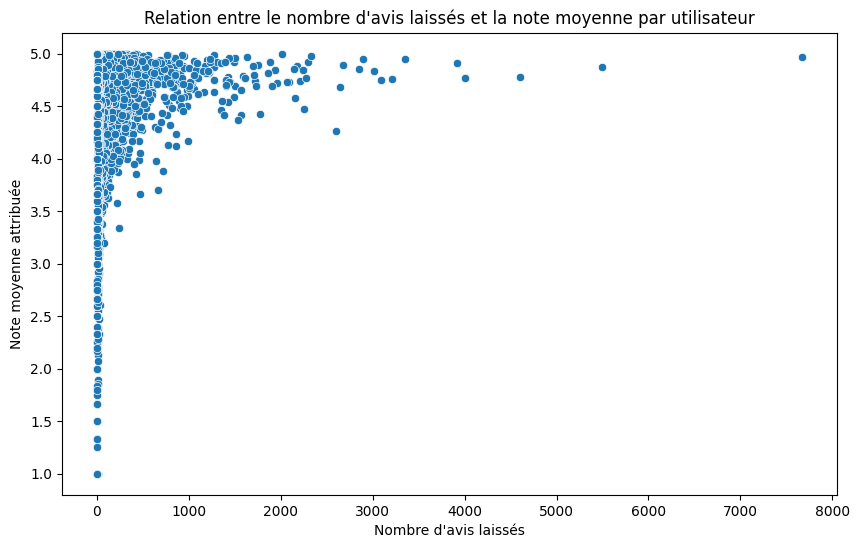

In [318]:
##relation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_without_0['user_id'].value_counts(), y=data_without_0.groupby('user_id', observed=True)['rating'].mean())
plt.title("Relation entre le nombre d'avis laissés et la note moyenne par utilisateur")
plt.xlabel("Nombre d'avis laissés")
plt.ylabel("Note moyenne attribuée")
plt.show()

In [319]:
##calculons la corrélation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur
correlation = data_without_0['user_id'].value_counts().corr(data_without_0.groupby('user_id', observed=True)['rating'].mean())
print(f"Corrélation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur : {correlation:.2f}")


Corrélation entre le nombre d'avis laissés et la note moyenne attribuée par utilisateur : 0.01


In [320]:
##le percentiles jusqu'à 99% des interactions par utilisateur,et regardons apres par au notes moyennes au recettes afin de voir si les utilisateurs qui laissent le plus d'avis ont tendance a donner des notes plus élevées ou plus basses.
data['user_id'].value_counts().describe(percentiles=[.25, .5, .75, .95, .99])


count    226570.000000
mean          4.997868
std          49.663111
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
95%          11.000000
99%          61.000000
max        7671.000000
Name: count, dtype: float64

In [321]:
bins = [0, 1, 10, 60, float('inf')]
labels = ['Faible', 'Modérée', 'Haute', 'Extrême']
data_without_0['interaction_level'] = pd.cut(data_without_0['user_id'].map(data_without_0['user_id'].value_counts()), bins=bins, labels=labels)
data_without_0['interaction_level'].value_counts(normalize=True) * 100

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_12976\3598943489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_0['interaction_level'] = pd.cut(data_without_0['user_id'].map(data_without_0['user_id'].value_counts()), bins=bins, labels=labels)


interaction_level
Extrême    52.954495
Haute      18.980047
Modérée    14.970229
Faible     13.095229
Name: proportion, dtype: float64

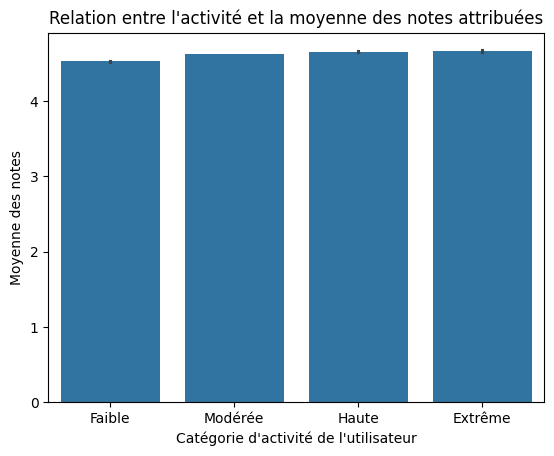

In [322]:
user_stats = data_without_0.groupby('user_id', observed=True).agg({'rating': 'mean', 'interaction_level': 'first'}).reset_index()
user_stats.rename(columns={'rating': 'note_moyenne'}, inplace=True)
sns.barplot(x='interaction_level', y='note_moyenne', data=user_stats, order=labels)
plt.title("Relation entre l'activité et la moyenne des notes attribuées")
plt.xlabel("Catégorie d'activité de l'utilisateur")
plt.ylabel("Moyenne des notes")
plt.show()


Les résultats montrent une distribution très homogène des notes :
quelle que soit la fréquence d’interaction d’un utilisateur, la moyenne des notes reste globalement stable, autour de 4.5 à 4.7.

Aucune tendance claire (ni croissante ni décroissante) n’apparaît entre le nombre d’avis laissés et la sévérité des notes attribuées.
Cette absence de corrélation suggère que le niveau d’activité n’a pas d’impact significatif sur la manière dont les utilisateurs notent les recettes.

En conclusion,les utilisateurs plus actifs ne semblent ni plus sévères ni plus indulgents que les autres, Autrement dit, l’activité ne détermine pas la sévérité de l’évaluation.


**isolation des notes negative (1 a 3)**



In [323]:
##creation d une colonne binaire qui indqiue si l avis est negative ou positive,en fonction de la note attribuée,la note de 1 a 3 est negative(1),et de 4 a 5 est positive(0)
data['binary_sentiment'] = data['rating'].apply(lambda x: 1 if x <= 3 else 0)


In [324]:
#compter combien d'avis négatifs
print((data['binary_sentiment'] == 1).sum())

67796


In [325]:
data.sample(5)

,user_id,recipe_id,date,rating,review,review_imputed,binary_sentiment
1094149,70910,20607,2010-05-22,5.0,This was excellent. I used a bag of frozen berries for the filling and they were perfect. I think you could cut back a bit on the sugar without hurting this dish. Thanks for the great recipe.,0,0
920294,207907,138454,2006-05-07,5.0,perfect!,0,0
125519,139078,92095,2004-06-25,5.0,"I made this the day before yesterday with the matching sauce recipe. Haved the tomato amounts but doubled the seasoning in the sauce recipe as we like it ""spicy"" but made the meatballs exactly as given. I did put the wet ingredients into a bowl, mixed them with my electric hand mixer, added the dry ingredients and the meat, mixed again; the meatballs were easy to form and stayed together despite the long cooking time. As my burners are hard to get low enough for a long time simmer, I put the pan with the sauce and meatballs in the oven at 325F for the three hour cooking time. My DH loved the meatballs. Reheated in the oven last time for another great meal.",0,0
608253,214730,121324,2005-05-10,5.0,"Mom called these ""K"" sandwiches because Dad was catholic and had to have fish on Friday. That was her humor ""K"" for ""Katholic""...",0,0
923993,1124123,87864,2009-07-30,5.0,"OMG are these good!! I made these with my kids last night, and they turned out so yummy. Thank you for this recipe!! I am sure we will be making it again.",0,0


In [326]:
#isolation des lignes dont la note est 4 ou nan
date_rating_4 = data[(data['rating'] == 4) | (data['rating'].isna())]

In [327]:
date_rating_4.sample(5)

,user_id,recipe_id,date,rating,review,review_imputed,binary_sentiment
159217,1429244,391028,2010-04-27,4.0,"I am a Raising Cane's snob and go there really only for the crinkle cut fries and the SAUCE!! I made this exactly as directed and found that it was a good base for the sauce, but it definitely wasn't THE sauce. I played around with it a lot and added a bit more ketchup, quite a bit more garlic, pepper and Worcestershire sauce and got it nearly perfect. Of course I didn't write anything down so it's going to just be one of those things I play around with each time. Definitely good base though.",0,0
1047776,360030,56260,2008-09-25,4.0,"This worked great when, after a long day, we just needed something quick and easy to make. I think next time I will add a can of tomatoes as we like our sauce a little chunky. Thanks for posting!",0,0
694778,1328942,33778,2009-09-08,4.0,"I give this a 4 due to my changes. I halved the recipe but I don't see how it would affect the taste/texture but as is, it wasn't a frosting at all. It was more like a glaze as someone stated. I had to add a bit more powdered sugar and about another 1 or 2 TB cocoa powder because it tasted more like butter than choco frosting. I ended up with a delicious, thick frosting. I'll be sure to note that this one needs some tweaking if you half it.",0,0
36115,2664302,184719,2013-01-28,4.0,"Made these on the long weekend - wasnt sure about the clag-glue style substitute for eggs as I wasnt looking for a specific egg-free recpie (I just didnt have any eggs!) <br/>Was a bit worried as the batter was super heavy but the result was pretty good - very sticky/gooey in the middle and I kept it in the oven longer then the 25mins. I also added a heap of extras: mixed nuts, choc chips, couple of fantales and raspberries.<br/>Next time if I added extras again I wouldnt add the salt and would love to try with added expresso.",0,0
656514,457829,27208,2007-03-29,4.0,this was pretty good the flavor reminded me of my moms roast i like the ingredients i have them on hand all the time thank you,0,0


In [328]:
import os
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer, TreebankWordTokenizer
nltk.download('wordnet', download_dir=os.path.join(os.getcwd(), 'nltk_data'))
nltk.download('omw-1.4', download_dir=os.path.join(os.getcwd(), 'nltk_data'))
nltk.download('punkt', download_dir=os.path.join(os.getcwd(), 'nltk_data'))
nltk.download('stopwords', download_dir=os.path.join(os.getcwd(), 'nltk_data'))
stop_words = stopwords.words('english')
nltk.data.path.append(os.path.join(os.getcwd(), 'nltk_data'))

[nltk_data] Downloading package wordnet to c:\Users\ABDILLAHIOMARDJAMA
[nltk_data]     \Downloads\MangeTaMain\notebooks\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to c:\Users\ABDILLAHIOMARDJAMA
[nltk_data]     \Downloads\MangeTaMain\notebooks\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to c:\Users\ABDILLAHIOMARDJAMA\D
[nltk_data]     ownloads\MangeTaMain\notebooks\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to c:\Users\ABDILLAHIOMARDJA
[nltk_data]     MA\Downloads\MangeTaMain\notebooks\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [329]:
import re

# --- Lexiques & patterns (inchangés dans l'esprit, regroupés) ---
SUBTLE_NEG_RE = re.compile(
    r"(just ok(?:ay)?|not really|didn't really|misleading|disappointed|expected better|"
    r"could be better|nothing special|mediocre|average at best|wouldn't recommend|"
    r"not impressed|fell short|lacked flavor|lack of|underwhelming|under season(?:ed)?|"
    r"over season(?:ed)?|too (?:salty|sweet|spicy|greasy|oily|dry|thick|thin)|"
    r"burnt|overcooked|undercooked)",
    re.IGNORECASE
)

NEGATION_WORDS = {
    "no","not","nor","never","neither","none","nobody","nothing","nowhere",
    "hardly","barely","scarcely","rarely","seldom","without","cannot","can't","won't",
    "wouldn't","shouldn't","didn't","doesn't","don't","isn't","aren't","wasn't","weren't"
}

POSITIVE_WORDS = {
    "good","great","excellent","amazing","wonderful","perfect",
    "love","like","recommend","delicious","tasty","tender","juicy","crispy","easy","quick"
}

NEGATIVE_WORDS = {
    "bad","bland","dry","tough","rubbery","chewy","soggy","salty","bitter","sour","greasy","oily",
    "burnt","overcooked","undercooked","gross","disgusting","horrible","terrible","inedible","stale",
    "watery","runny","thick","thin","hard","raw","uncooked","boring","awkward","messy","confusing","complicated"
}

NEGATED_POS_PAT = re.compile(
    r"^(?:not_(?:good|great|excellent|amazing|wonderful|perfect|love|like|recommend|delicious|tasty)|"
    r"(?:good|great|excellent|amazing|wonderful|perfect|love|like|recommend|delicious|tasty)_NEG)$"
)

# --- Petits utilitaires compacts ---
CONTRACTIONS = {
    "don't":"do not","doesn't":"does not","didn't":"did not","can't":"cannot","won't":"will not",
    "isn't":"is not","aren't":"are not","wasn't":"was not","weren't":"were not","shouldn't":"should not",
    "wouldn't":"would not","couldn't":"could not","haven't":"have not","hasn't":"has not","hadn't":"had not",
    "ain't":"is not"
}
_CONTR_RE = re.compile(r"\b(" + "|".join(map(re.escape, CONTRACTIONS)) + r")\b", re.IGNORECASE)
_TOK_RE = re.compile(r"[A-Za-z']+|[.!?;]")
_CLAUSE_BREAKERS = {".","!","?",";","but","however","though","although","yet"}

def clean_review(text: str, window: int = 3) -> str:
    if not text:
        return ""
    s = _CONTR_RE.sub(lambda m: CONTRACTIONS[m.group(0).lower()], str(text).lower().strip())
    tokens = _TOK_RE.findall(s)
    out, neg = [], 0
    for t in tokens:
        if t in _CLAUSE_BREAKERS: neg = 0; continue
        if t in NEGATION_WORDS or t == "not": neg = window; out.append("not"); continue
        if neg > 0 and t in POSITIVE_WORDS: out.append(f"not_{t}"); neg -= 1; continue
        out.append(t); 
        if neg > 0: neg -= 1
    return " ".join(out)

_SENT_SPLIT_RE = re.compile(r"[.!?;]+")

def is_negative_sentence(sent: str, clean_tokens: list) -> bool:
    if SUBTLE_NEG_RE.search(sent): return True
    toks = re.findall(r"[a-z]+", sent.lower())
    if any(t in NEGATIVE_WORDS for t in toks): return True
    if any(t in NEGATION_WORDS or t == "not" for t in toks) and any(t in POSITIVE_WORDS for t in toks): return True
    if any(NEGATED_POS_PAT.match(t) for t in clean_tokens): return True
    return False

def binary_sentiment(review: str, clean_review_str: str) -> int:
    clean_tokens = clean_review_str.split()
    for s in filter(None, _SENT_SPLIT_RE.split(str(review))):
        if is_negative_sentence(s, clean_tokens):
            return 1
    return 0

# --- Pipeline concise pandas ---
# 1) régénérer clean_review
date_rating_4["clean_review"] = date_rating_4["review"].map(clean_review)

# 2) calculer le sentiment binaire
date_rating_4["binary_sentiment"] = date_rating_4.apply(
    lambda r: binary_sentiment(r["review"], r["clean_review"]), axis=1
)


C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_12976\173330585.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_rating_4["clean_review"] = date_rating_4["review"].map(clean_review)
C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_12976\173330585.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_rating_4["binary_sentiment"] = date_rating_4.apply(


In [330]:
### verifiet combien de binary sentiment sont négatifs
date_rating_4['binary_sentiment'].value_counts()

binary_sentiment
0    178979
1     69228
Name: count, dtype: int64

In [277]:
#ratio avis négatifs détectés
print(date_rating_4['binary_sentiment'].mean()*100, "%")

#compter combien d'avis négatifs ont été détectés
print(date_rating_4['binary_sentiment'].sum())


27.891235944191745 %
69228


In [331]:
#update des valeurs dans le dataset original
data.update(date_rating_4[['binary_sentiment']])

In [334]:
data.sample(5)

,user_id,recipe_id,date,rating,review,review_imputed,binary_sentiment
681370,126440,98364,2011-01-21,5.0,This is the recipe brought back by a coworker from Prague and it is delicious. I will reduce the cloves a bit though. I cooked it much longer than stated and it thickened up beautifully. Great over noodles.,0,0
312407,233238,39570,2005-10-12,5.0,"I made this on a week night, after getting home from work. It's quick, easy and delicious. The kids loved it, which is always a bonus. I used 4 cloves fresh garlic instead of powder. Will make this again. Thank you!",0,0
251331,359220,13546,2009-03-21,3.0,"This sure is a quick little recipe for a busy night! By the time DH had driven three blocks away to the grocery store, I had an entire pizza in the oven! I had to add about 5 minutes to the cooking time, which still didn't help the middle cook through. Also, the toppings were pretty browned and crispy. A little too bland for us, but I'll still keep the recipe on hand for those nights when I REALLY need a quick meal. Thanks for posting!",0,1
535259,134164,35213,2008-08-06,4.0,"I didn't peel the tomatoes but I should have because the peel was bitter. The tomatoes on the bottom got really soggy and I wonder if the peel had something to do with that. I didn't blend the cottage cheese and lemon juice, just mashed them with a fork. I also used breadcrumbs instead of cracker meal. The top onions/mushroom part was really great!",0,1
610113,1741224,73488,2011-06-24,5.0,"This looks like a great recipe but I'm a little confused. Why does it say ""unrolled"" crescent roll dough in the directions? It seems like you need to leave it rolled in order to slice it.",0,0


In [335]:
# Exemple : interactions = table avec review_id, recipe_id, is_negative
# recipes = table principale des recettes

# 1. Calculer le nombre d'avis négatifs et le total d'avis par recette
recipe_sentiment = (data.groupby('recipe_id')['binary_sentiment']
              .agg(total_reviews='count', negative_reviews='sum')
              .reset_index()
)

In [347]:
##affichons les 5 premières lignes
recipe_sentiment.sample(5)

,recipe_id,total_reviews,negative_reviews
231420,533951,3,0
106664,188906,1,0
170361,325299,1,1
142748,263519,2,1
162827,307828,7,3


In [350]:
##afficher les infos pour le recipe 188906 dans la table data
data[data['recipe_id'] == 307828]


,user_id,recipe_id,date,rating,review,review_imputed,binary_sentiment
928775,143721,307828,2008-06-07,5.0,"Made this today for ZWT4. Had been working on house today in upper 90 degree temperatures. This was very refreshing and thrist quenching. After the first two glasses, add some rum and this makes a real nice drink! Thanks for a new summertime beverage.",0,0
928776,837251,307828,2008-06-09,1.0,"Sorry, i didn't like this at all. I used lemons and it was so bitter nobody liked it. Next time i WILL peel the lemons, as the rest of the recipe seems quite nice. Made for ZWT4",0,1
928777,102058,307828,2008-06-18,4.0,"Excellent ! I used both lemons and limes in my brand spanking new blender and this turned out brilliantly.... I served a caraffe full to the kids and DH... the kids are still small and fussy and rejected it but both DH and I loved it. DH isn't even a huge fan of lemons or limes so what an unexpected surprise. Between us we finished the lot. Please see my Rating System: 4 excellemt stars for a very good summer recipe.. fresh and full of flavour and if you prefer it tarter or sweeter it's easily adjustable, we will be making this again. Thanks!",0,0
928778,618715,307828,2008-06-27,4.0,"This was very good. It was a little too watery for me, and I did measure exactly and didn't use ice cubes. I would just reduce the water next time.",0,1
928779,344231,307828,2008-07-01,4.0,We liked this drink just as it was but also tried it as an added kick to some Sprite. I used 1/4 limonada to 3/4 Sprite and it was a great drink. (-: Made for ZWT4.,0,0
929202,602448,307828,2008-07-11,3.0,This was refreshing. I used limes and lemons. I also found this to be pretty bitter even with doubling the sugar. I also halved the water and used lots of ice. I think if I used cheese cloth it might take out more of the pith and be less bitter.,0,1
929203,186855,307828,2009-04-10,5.0,Fantastic beverage. I used just limes and was very pleased. This will be especially nice on a hot afternoon. Thanks for posting such a lovely recipe. Made for Spring PAC 2009.,0,0


In [352]:
recipe_sentiment.dtypes

recipe_id                int64
total_reviews            int64
negative_reviews         int64
negative_percentage    float64
dtype: object

In [356]:
recipe_sentiment.sample(5)

,recipe_id,total_reviews,negative_reviews,negative_percentage
114990,205563,1,1,100.000000
184660,361819,1,1,100.000000
161835,305796,15,4,26.666667
132498,241353,4,0,0.000000
39285,68430,13,5,38.461538


In [357]:
##suppression de la colonne negative_percentage
recipe_sentiment.drop(columns=['negative_percentage'], inplace=True)

In [358]:
###calculons un score de sentiment négatif pour chaque recette,ou on fait le produit entre le nombre d avis negatif et le logarithme du nombre total d avis + 1 pour eviter le que le recette avec beaucoup d avis ait un score trop elevé.
recipe_sentiment['negative_score'] = recipe_sentiment['negative_reviews'] * np.log1p(recipe_sentiment['total_reviews'])

In [378]:
recipe_sentiment.sample(5)

,recipe_id,total_reviews,negative_reviews,negative_score
169549,323372,12,0,0.000000
193079,383206,2,2,2.197225
31053,54942,5,0,0.000000
131458,239002,2,0,0.000000
66960,114897,3,0,0.000000


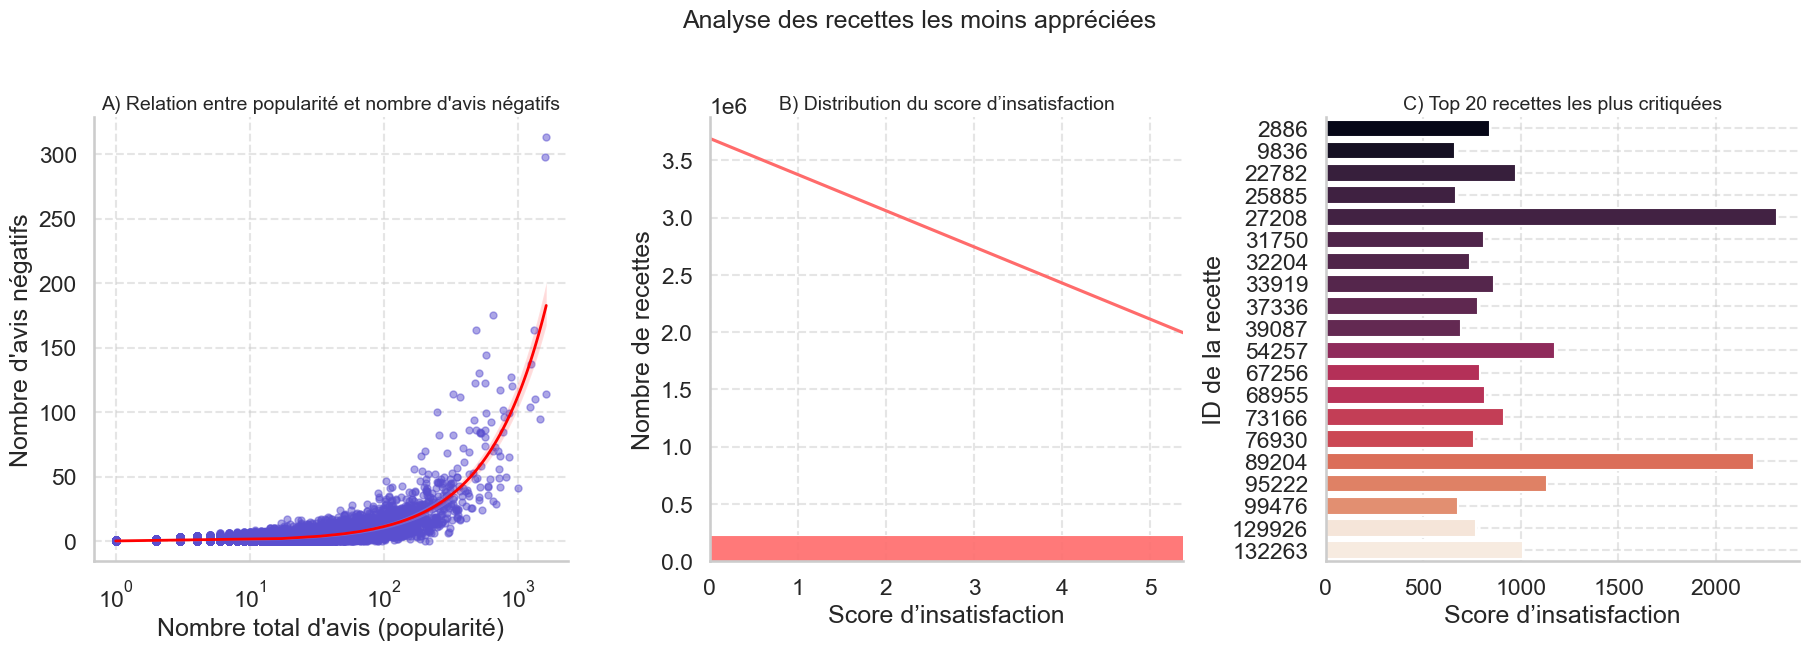

In [388]:
sns.set_theme(style="whitegrid", context="talk")

# --- Top 20 recettes les plus critiquées ---
top20_bad = recipe_sentiment.nlargest(20, "negative_score").copy()
top20_bad = top20_bad.sort_values("negative_score", ascending=True)

fig, axes = plt.subplots(1, 3, figsize=(22, 6))
fig.subplots_adjust(wspace=0.3, top=0.85)

# ============================================
# A) Popularité vs avis négatifs
# ============================================
sns.regplot(
    data=recipe_sentiment,
    x="total_reviews", y="negative_reviews",
    scatter_kws={"alpha": 0.5, "color": "#5A4FCF", "s": 25},
    line_kws={"color": "red", "lw": 2},
    ax=axes[0]
)
axes[0].set_title("A) Relation entre popularité et nombre d'avis négatifs", fontsize=14)
axes[0].set_xlabel("Nombre total d'avis (popularité)")
axes[0].set_ylabel("Nombre d'avis négatifs")
axes[0].set_xscale("log")  # échelle log pour mieux visualiser les extrêmes
axes[0].grid(True, linestyle="--", alpha=0.5)

# ============================================
# B) Distribution du score d’insatisfaction
# ============================================
sns.histplot(
    data=recipe_sentiment,
    x="negative_score",
    bins=40, kde=True, color="#FF6B6B", alpha=0.9, ax=axes[1]
)
axes[1].set_title("B) Distribution du score d’insatisfaction", fontsize=14)
axes[1].set_xlabel("Score d’insatisfaction")
axes[1].set_ylabel("Nombre de recettes")
axes[1].set_xlim(0, np.percentile(recipe_sentiment["negative_score"], 95))  # zoom sur zone utile
axes[1].grid(True, linestyle="--", alpha=0.5)

# ============================================
# C) Top 20 recettes les plus critiquées
# ============================================
sns.barplot(
    data=top20_bad,
    x="negative_score", y="recipe_id",
    hue="recipe_id", palette="rocket", orient="h", legend=False, ax=axes[2]
)
axes[2].set_title("C) Top 20 recettes les plus critiquées", fontsize=14)
axes[2].set_xlabel("Score d’insatisfaction")
axes[2].set_ylabel("ID de la recette")
axes[2].grid(True, linestyle="--", alpha=0.5)

# ============================================
# Mise en forme finale
# ============================================
sns.despine()
fig.suptitle("Analyse des recettes les moins appréciées", fontsize=18, y=1.03)
plt.show()

- Relation entre popularité et nombre d’avis négatifs

On observe une corrélation positive entre le nombre total d’avis et le nombre d’avis négatifs.
Plus une recette est populaire, plus elle accumule de critiques, non pas forcément parce qu’elle est mauvaise, mais parce qu’elle est plus exposée. Les recettes peu connues reçoivent, quant à elles, très peu de retours négatifs.

- Distribution du score d’insatisfaction

La majorité des recettes présentent un score d’insatisfaction très faible, ce qui traduit une satisfaction globale élevée.
Seule une minorité de recettes se distingue avec des scores élevés, correspondant à des cas isolés de mécontentement.

- Top 20 des recettes les plus critiquées

Le classement met en évidence une poignée de recettes concentrant la majorité des critiques.
Ces recettes méritent une attention particulière, car elles semblent poser problème de manière récurrente — peut-être à cause de leur complexité, du manque de clarté ou de la composition des ingrédients.

Conclusion générale:

En conclusion, on constate que l’activité des utilisateurs (le nombre d’avis laissés) n’influence pas leur sévérité ni leur objectivité,
tandis qu’au niveau des recettes, une popularité plus forte s’accompagne d’une augmentation du nombre d’avis négatifs.
Cette dynamique montre que la visibilité amplifie la critique, sans pour autant impliquer une baisse réelle de qualité.

Problématique pour la suite :

Quels facteurs (temps de préparation, complexité, type d’ingrédients, catégorie culinaire, etc.) 

expliquent que certaines recettes soient beaucoup plus critiquées que d’autres ?

In [389]:
##sauvegarde du dataset final apres le traitement
recipe_sentiment.to_csv("../../processed_recipe.csv", index=False)